In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path_1 = Path('/Users/oleseifert/Documents/Techlabs/SoSe-21-Team-10_Main/data/raw')
df = pd.read_csv(path_1.joinpath('2000-2002.csv'), index_col='date', parse_dates=True)

In [3]:
# drop the 'fips' column, because it is useless
df = df.drop(['fips'], axis=1)

# Intrpolate the data

In [4]:
df.interpolate(method='time', inplace=True)
df.dropna(how='any', inplace=True)

# Transform the problem into a supervised learning problem

In [5]:
df['target'] = df.score.shift(-1)
df.dropna(inplace=True)

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into train and test set

In [18]:
X_train = df.drop(['target'], axis = 1).iloc[0:764]
X_test = df.drop(['target'], axis = 1).iloc[764:]
y_train = df.target.iloc[0:764]
y_test = df.target.iloc[764:]

# Create the model

In [24]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
model.score(X_test, y_test)

0.9924403664462629

In [27]:
prediction = model.predict(X_test)

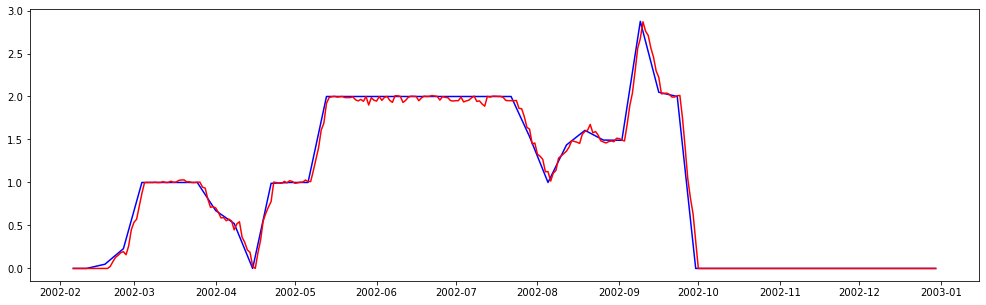

In [39]:
plt.figure(figsize=(17,5))
plt.plot(df.index[764:], y_test, color='blue')
plt.plot(df.index[764:], prediction, color='red')